In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

import numpy as np

In [2]:
df = pd.read_csv(r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\stars_06\data.csv", comment='#')

df

,id,HJD,BCV,RV2,RV1
0,1181,6692.881093,28.846540,-34.1690,-173.8014
1,1142,6736.658851,20.611890,-49.8295,-139.1608
2,1143,6749.690034,15.498930,-125.8408,-47.4342
3,1140,6769.673483,6.484246,-10.9452,-150.2172
4,1131,6790.564910,-3.409508,-136.3682,-5.3551
5,1130,6840.580503,-23.253550,-75.1153,-32.6594
6,1124,6869.527843,-27.983050,-69.0281,-23.7950
7,1119,6898.491687,-26.264930,10.5100,-104.1421
8,1120,6904.490569,-25.087140,-35.8785,-68.7917


In [3]:
T0 = 1906.0056 
P = 8.5365711

df['phase'] =  ((df['HJD'] - T0) / P) - np.floor((df['HJD'] - T0) / P)

In [4]:
df['RV1_corr'] = df['RV1'] + df['BCV']
df['RV2_corr'] = df['RV2'] + df['BCV']

In [5]:
df.to_csv("binary.csv", index=False)

In [6]:
def func(x, a, b):
    return a*np.sin(2*np.pi*x) + b

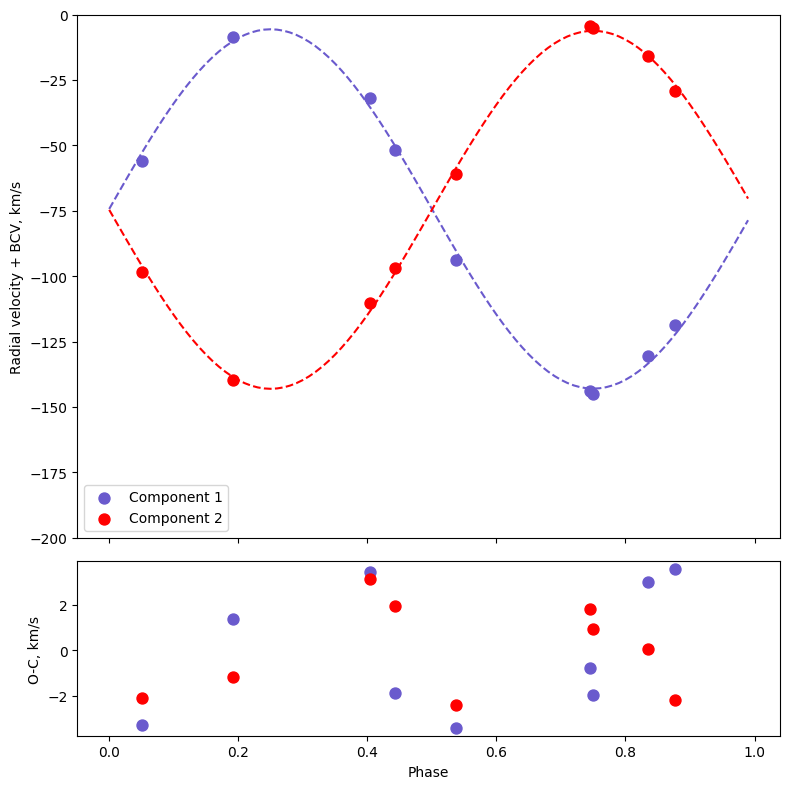

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), tight_layout = True, height_ratios=[3, 1], sharex=True)

popt0, _ = curve_fit(func, df['phase'], df['RV1_corr'], p0=[50, -80])
popt1, _ = curve_fit(func, df['phase'], df['RV2_corr'], p0=[-50, -80])
x = np.arange(0, 1, 0.01)

axs[0].plot(x, func(x, popt0[0], popt0[1]), linestyle='dashed', color='slateblue')
axs[0].scatter(df['phase'], df['RV1_corr'], color='slateblue', marker='.', s=250, label='Component 1')

axs[0].plot(x, func(x, popt1[0], popt1[1]), linestyle='dashed', color='red')
axs[0].scatter(df['phase'], df['RV2_corr'], color='red', marker='.', s=250, label='Component 2')

axs[0].set_ylabel('Radial velocity + BCV, km/s')
axs[0].set_ylim(-200, 0)
axs[0].legend()

axs[1].scatter(df['phase'], df['RV1_corr'] - func(df['phase'], popt0[0], popt0[1]), color='slateblue', marker='.', s=250, label='Component 1')
axs[1].scatter(df['phase'], df['RV2_corr'] - func(df['phase'], popt1[0], popt1[1]), color='red', marker='.', s=250, label='Component 2')

axs[1].set_ylabel('O-C, km/s')
axs[1].set_xlabel('Phase')

fig.savefig('binary.pdf', dpi=600)

In [8]:
popt0

array([ 68.66896501, -74.31468791])

In [9]:
popt1

array([-68.40383599, -74.65261899])